# Community alignment of training questions

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from ollama_models import ollama_models
models = ollama_models()

In [3]:
from community_alignment import community_alignment

Loaded existing index from forecast_index.faiss
Index contains 4884 vectors at initialization


100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11932.59it/s]

saved community_cogito:latest.json


,model,id,title,error
1,cogito:latest,8734,What percentage of new vehicle production will...,0.388404
6,cogito:latest,6614,What is the highest value 1 bitcoin will ever ...,0.574351
3,cogito:latest,1482,What percentage of Americans will be obese or ...,0.578795
7,cogito:latest,1337,Drake's Equation 1st Parameter R∗: What is the...,0.596372
5,cogito:latest,3054,How many hours will the average American emplo...,0.647048
0,cogito:latest,7811,How many nuclear weapons will be detonated off...,0.672941
4,cogito:latest,1454,What will be the total aggregate score given t...,0.750000
9,cogito:latest,2622,What will be the highest level of annual GDP g...,0.800000
2,cogito:latest,6633,In how many years will humanity's descendants ...,1.000000
8,cogito:latest,5531,How many seats will be on the Supreme Court of...,1.000000


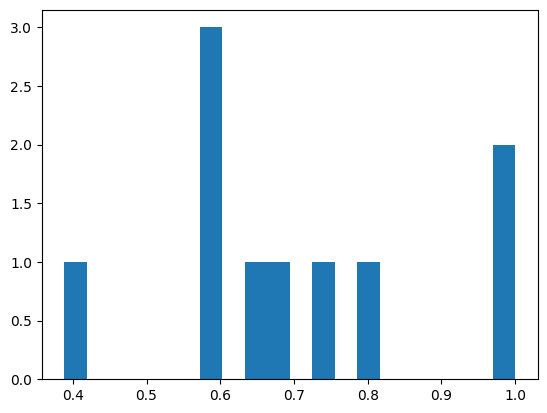

In [4]:
dfs = {}
for model in models:
    df = community_alignment(model)
    dfs[model] = df
    df1 = df[['model', 'id', 'title', 'error']].sort_values(by='error')
    display(df1)
    break